# Geometric Transformation
Here we conserns about linear transformation of the 2D image. These are commonly used in transforming scanned text to get streight perspective and consistent vision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#don't %matplotlib inline
# NOTE notebook QT behaivior is platform depended. I used Ubuntu 16.04.

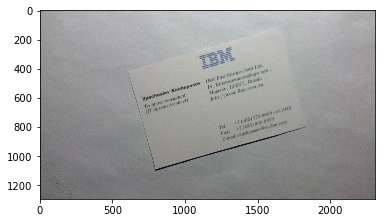

In [2]:
img = cv2.cvtColor(cv2.imread('card1.jpg'), cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.show()

Transformation is defined by four corner points of the plain. To find coordinates do a close look by interactive QT viewer and manually estimate coordinates. Normaly Jupyter starts interactive settion with backend by ** %matplotlib qt5 **. We have started one above, so we use **switch_backend()** instead.

In [3]:
#don't %matplotlib qt 
plt.switch_backend('Qt5Agg')
plt.imshow(img)
plt.show()

In [4]:
# check manualy estimated points
plt.imshow(img)
plt.plot(600, 419, '*')
plt.plot(797, 1093, '*')
plt.plot(1830, 793, '*')
plt.plot(1643, 124, '*')
plt.show()

## Define the geometric transformation.

<IPython.core.display.Javascript object>


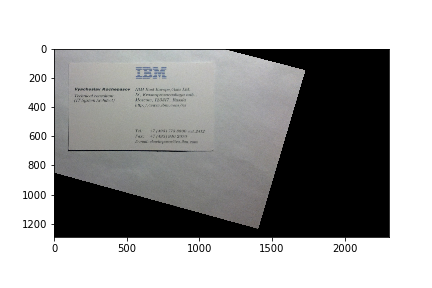

In [5]:
def warp(image, orig, dest):
    """
    It makes linear transformation of the image according to the planes specified.
    
    :param image: np.ndarray cv2 original image.
    :param orig: np.ndarray float32 [x,y] defines scewed plane by four corner points.
    :param dest: np.ndarray float32 [x,y] defines transdormed "warped" straight plane.
    :return: np.ndarray cv2 warped image.
    """
    # calculate transform matrix
    M = cv2.getPerspectiveTransform(orig, dest)
    # cv2 width x height
    imageSize = (image.shape[1], image.shape[0])
    # apply
    warped = cv2.warpPerspective(image, M, imageSize, flags=cv2.INTER_LINEAR)
    return warped

# Note all points are listed in same order: top-letf, low-left, low-right, up-right .
sourcePlane = np.float32([ [600,419], [797,1093], [1830,793], [1643,124] ])
# define consistent vision 1000x600
normalPlane = np.float32([ [100,100], [100,700], [1100,700], [1100,100]])

normalImg = warp(img, sourcePlane, normalPlane)
plt.switch_backend('nbAgg')
plt.imshow(normalImg)
plt.show()

Cutting off all except target plane.

<IPython.core.display.Javascript object>


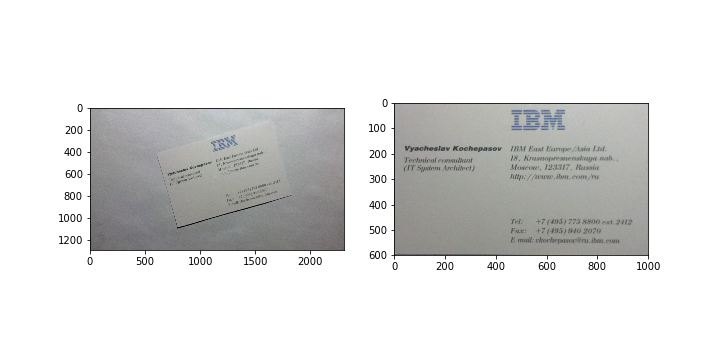

In [9]:
std = np.copy(normalImg)[100:700, 100:1100, :]

f = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(std)
plt.show()